In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  

from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv("D:\\assignment\\decision tree\\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
#create dummies for categorical variables
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [4]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [5]:
# Creating a column'income' on behaviour 

In [6]:
df["Income"] =pd.cut(df["Taxable.Income"], bins = [10000,30000,99999], labels = ["Risky", "Good"])

In [7]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Income
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [8]:
df = pd.get_dummies(df,columns = ["Income"],drop_first=True)

In [9]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Income_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


In [10]:
df.tail(20)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Income_Good
580,31721,123335,1,1,0,0,1,1
581,31085,57473,10,1,0,0,1,1
582,84931,32907,12,1,1,0,1,1
583,69036,28874,19,0,1,0,0,1
584,42679,155684,4,0,0,0,1,1
585,84557,137622,2,0,0,1,1,1
586,54126,106230,30,1,0,1,0,1
587,87685,154677,26,0,0,1,1,1
588,85076,93242,27,1,1,0,1,1
589,31633,30774,10,1,1,0,0,1


## feature scaling

In [11]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
df_norm=norm_func(df.iloc[:,0:])

In [13]:
df_norm

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Income_Good
0,0.656468,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.264428,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.300415,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.448436,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.792258,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
595,0.740236,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.669122,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.416566,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.988540,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


## Feature selection

In [14]:
#target variable=Income
#Feature varable= all columns expect income
x=df_norm.drop(['Income_Good'],axis=True)
y=df_norm['Income_Good']

In [15]:
x

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.656468,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.264428,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.300415,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.448436,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.792258,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
595,0.740236,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.669122,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.416566,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.988540,0.886810,0.566667,1.0,1.0,0.0,0.0


In [16]:
y.tail(20)

580    1.0
581    1.0
582    1.0
583    1.0
584    1.0
585    1.0
586    1.0
587    1.0
588    1.0
589    1.0
590    1.0
591    0.0
592    1.0
593    1.0
594    1.0
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: Income_Good, dtype: float64

## Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
prediction =model.predict(x_train)

In [21]:
prediction

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [22]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)


In [23]:
accuracy

1.0

In [24]:
np.mean(prediction == y_train)

1.0

[Text(0.5, 0.75, 'Taxable.Income <= 0.224\ngini = 0.328\nsamples = 600\nvalue = [124, 476]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 476\nvalue = [0, 476]')]

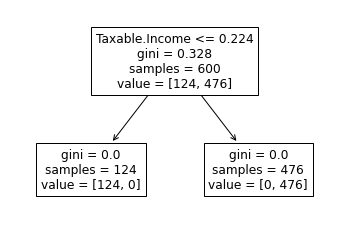

In [25]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)
features = ['Taxable.Income','City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES','Income_Good']
x = df[features]
y=df['Income_Good']
tree.plot_tree(dtree,feature_names=features)

In [26]:
from sklearn import tree
x = df[features]
y=df['Income_Good']
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

In [27]:
y_pred=clf.predict(x_test)

In [28]:
y_pred

array([0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1.])

In [29]:
from sklearn import metrics

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


[Text(0.5, 0.75, 'X[0] <= 0.224\ngini = 0.311\nsamples = 420\nvalue = [81, 339]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 81\nvalue = [81, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 339\nvalue = [0, 339]')]

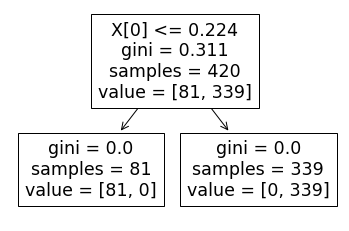

In [32]:
tree.plot_tree(clf)

In [33]:
colnames = list(df.columns)
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'Income_Good']

In [ ]:
import matplotlib.pyplot as plt

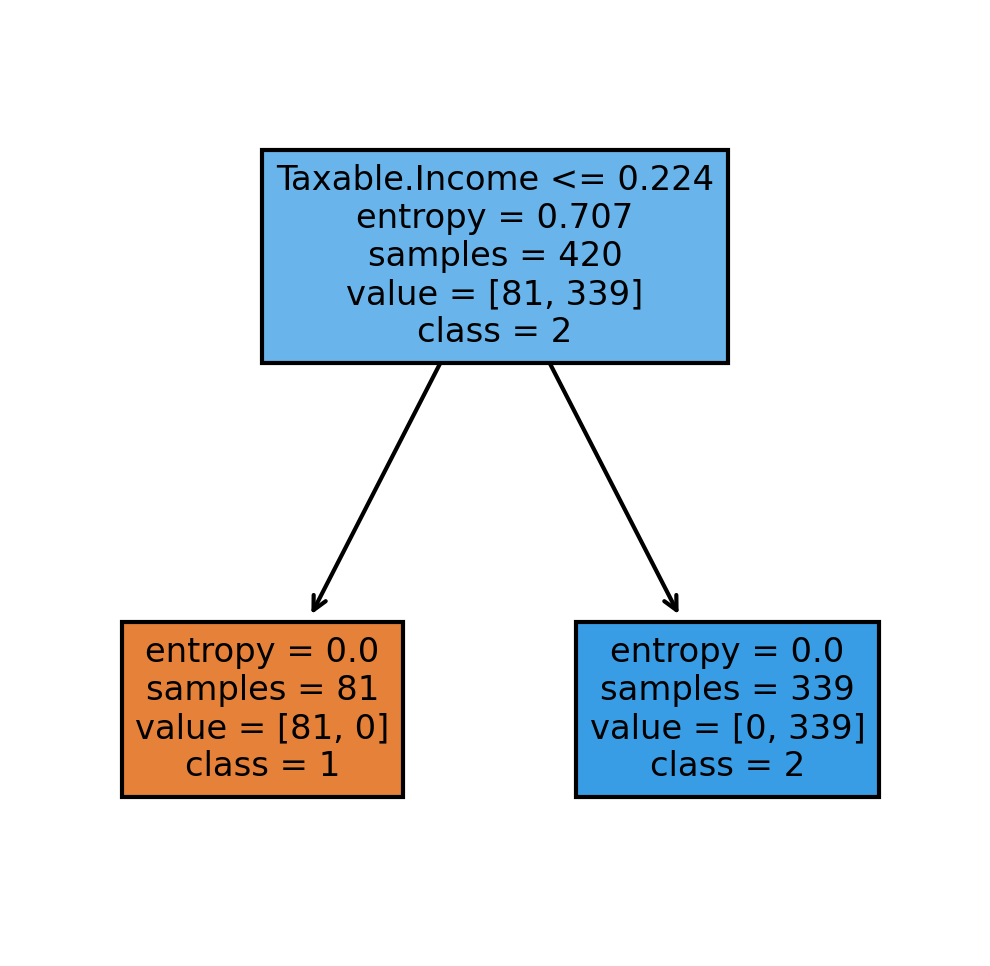

In [36]:
fn=['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'Income_Good']
cn=['1', '2',]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [37]:
#Predicting on test data
predict = model.predict(x_test) # predicting on test data set 
pd.Series(predict).value_counts() 

1.0    137
0.0     43
dtype: int64

In [38]:
predict

array([0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1.])

In [40]:
y_test.value_counts()

1.0    137
0.0     43
Name: Income_Good, dtype: int64

In [41]:
pd.crosstab(y_test,predict)

col_0,0.0,1.0
Income_Good,,
0.0,43,0
1.0,0,137


In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

1.0

In [43]:
np.mean(predict==y_test)*100

100.0

## CART using gini

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

model_gini.fit(x_train,y_train)

model_gini

pred=model.predict(x_test)

np.mean(pred==y_test)*100

100.0